# State Transition Graph

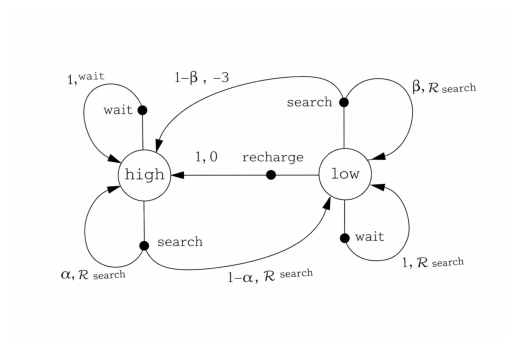

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/stg.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Define MDP Parameters

In [2]:
# Parameters
alpha = 0.8    # P(high | high, search)
beta = 0.6     # P(low | low, search)
r_search = 3   # Reward for search
r_wait = 1     # Reward for wait
gamma = 0.9    # Discount factor


# Initializing Value

In [3]:
# Initialize value estimates
v_high = 0.0
v_low = 0.0

# Storing Value Estimates

In [4]:
# Lists to store the evolution of values
v_high_list = []
v_low_list = []


# Solving for values

In [5]:
def solve_values(tol=1e-6, max_iter=1000):
    global v_high, v_low
    for it in range(max_iter):
        v_high_old, v_low_old = v_high, v_low

        # Bellman backup for high
        search_high = r_search + gamma * (alpha * v_high + (1 - alpha) * v_low)
        wait_high = r_wait + gamma * v_high
        v_high = max(search_high, wait_high)

        # Bellman backup for low
        search_low = beta * r_search - 3 * (1 - beta) + gamma * ((1 - beta) * v_high + beta * v_low)
        wait_low = r_wait + gamma * v_low
        recharge = gamma * v_high
        v_low = max(search_low, wait_low, recharge)

        # Save values for plotting
        v_high_list.append(v_high)
        v_low_list.append(v_low)

        # Check for convergence
        if max(abs(v_high - v_high_old), abs(v_low - v_low_old)) < tol:
            print(f"Converged in {it+1} iterations.")
            break

    return v_high, v_low

v_high_star, v_low_star = solve_values()

Converged in 120 iterations.


# Printing Final values

In [6]:
print(f"Optimal value at high: {v_high_star:.4f}")
print(f"Optimal value at low : {v_low_star:.4f}")

Optimal value at high: 25.4237
Optimal value at low : 22.8813


# Plotting Figures

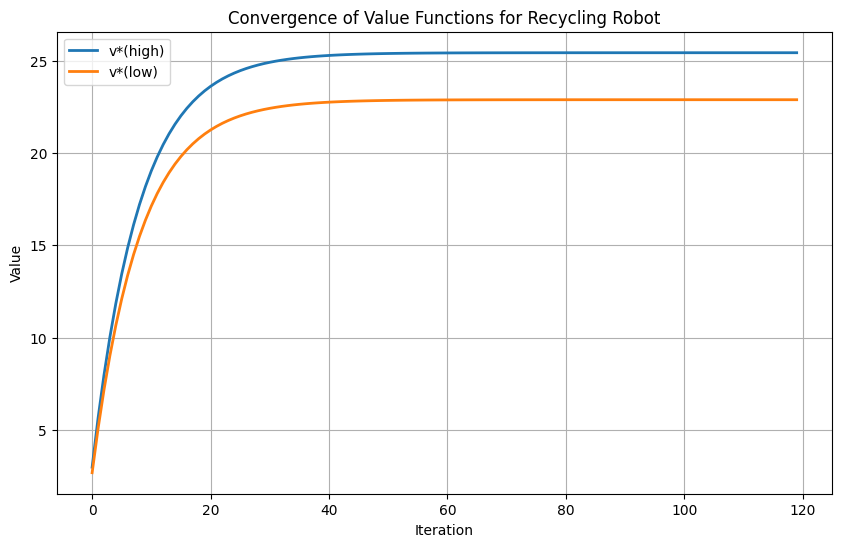

In [8]:
plt.figure(figsize=(10,6))
plt.plot(v_high_list, label="v*(high)", linewidth=2)
plt.plot(v_low_list, label="v*(low)", linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of Value Functions for Recycling Robot')
plt.grid(True)
plt.legend()
plt.show()

# Extracting Optimal Policy

In [11]:
def extract_policy():
    policy = {}

    # ----- HIGH state -----
    search_high = r_search + gamma * (alpha * v_high + (1 - alpha) * v_low)
    wait_high = r_wait + gamma * v_high

    if search_high > wait_high:
        policy['High'] = 'Search'
    else:
        policy['High'] = 'Wait'

    # ----- LOW state -----
    search_low = beta * r_search - 3 * (1 - beta) + gamma * ((1 - beta) * v_high + beta * v_low)
    wait_low = r_wait + gamma * v_low
    recharge = gamma * v_high

    best_low = max(search_low, wait_low, recharge)

    if best_low == search_low:
        policy['Low'] = 'Search'
    elif best_low == wait_low:
        policy['Low'] = 'Wait'
    else:
        policy['Low'] = 'Recharge'

    return policy


In [12]:
optimal_policy = extract_policy()

print("Optimal Policy:")
for state, action in optimal_policy.items():
    print(f"{state} -> {action}")

Optimal Policy:
High -> Search
Low -> Recharge


## The optimal policy is to Search when in the High state and Recharge when in the Low state.